# Soft-Actor-Critic Method
---
In this notebook, we train SAC with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from SAC_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('Pendulum-v0')
env.seed(2)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], seed=2)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
print('action space size : {}'.format(env.action_space))
print('observation space size : {}'.format(env.observation_space))

action space size : Box(1,)
observation space size : Box(3,)


### 3. Train the Agent with SAC

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [4]:
### A RANDOM AGENT
state = env.reset()
score = 0
t = 0
while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    env.render()
    state = next_state
    score+=reward
    t+=1
    if done:
        break
print(score)
print('Time step ',t)
env.close()

-1276.6306987653966
Time step  200


Episode 100	Average Score: -561.28
Episode 200	Average Score: -247.42


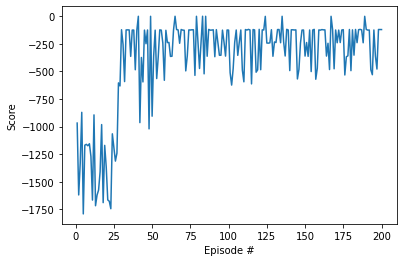

In [5]:
def TD3(n_episodes=200, max_t=300, up_t = 1, start_steps = 5000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    steps = 0
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            if(steps<=start_steps):
                action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
            if ((t+1)%up_t==0):
                agent.step(state, action, reward, next_state, done, t, update=True)
            else :
                agent.step(state, action, reward, next_state, done, t)
            state = next_state
            score += reward
            steps += 1
            if done:
                break

        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tTime steps :{}'.format(i_episode, np.mean(scores_deque), score, steps), end="")
        torch.save(agent.actor_local.state_dict(), 'weights/checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'weights/checkpoint_critic.pth')
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = TD3()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [15]:
agent.actor_local.load_state_dict(torch.load('weights/checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('weights/checkpoint_critic.pth'))
env = gym.make('Pendulum-v0')

state = env.reset()
score = 0
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    score+=reward
    if done:
        break

print(score)
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
-1.8457152587609285
